In [81]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import librosa.feature

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
# Import the csv file listing the labels.
data = pd.read_csv('urbansounds.csv')

In [84]:
# There are four audio files that appear corrupted and having trouble being read.
# Omit these two from the dataset.
data = data[~data['ID'].isin([300, 1182, 1488, 3806])]

In [85]:
# Create a new column in the dataframe that will provide the URL for each sound file.
data['File'] = data.apply(lambda row: 'UrbanSounds/' + str(row.ID) + '.wav', axis=1)

In [86]:
# Get value counts for each class.
data['Class'].value_counts()

jackhammer          668
engine_idling       624
siren               607
street_music        600
dog_bark            600
air_conditioner     600
drilling            600
children_playing    600
car_horn            302
gun_shot            230
Name: Class, dtype: int64

In [87]:
# Create a set of classes.
classes = set(data['Class'])

In [88]:
classes

{'air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music'}

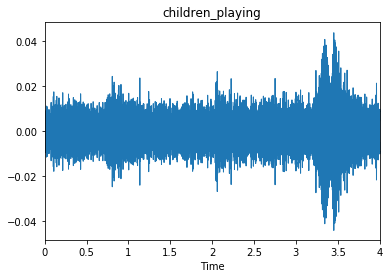

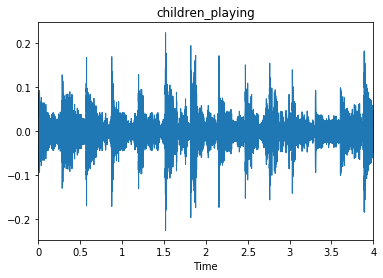

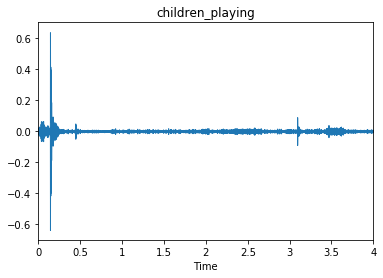

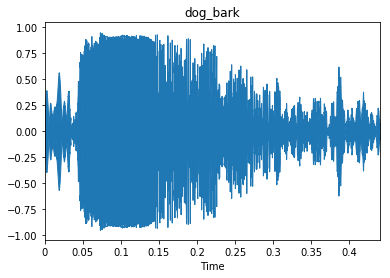

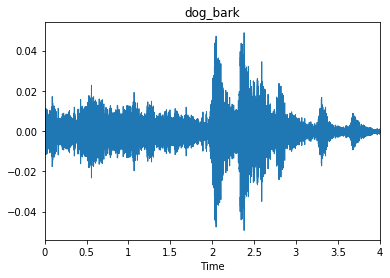

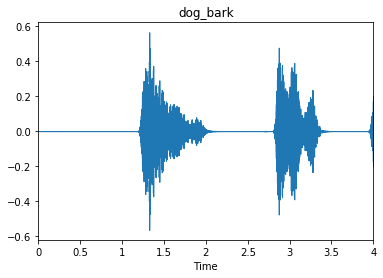

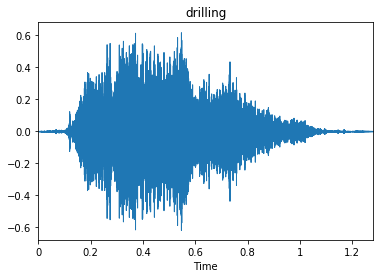

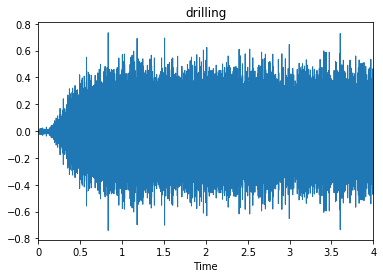

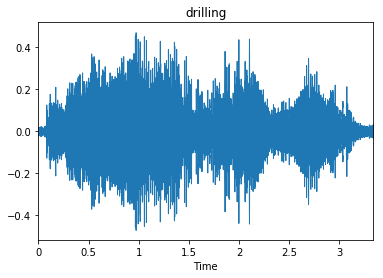

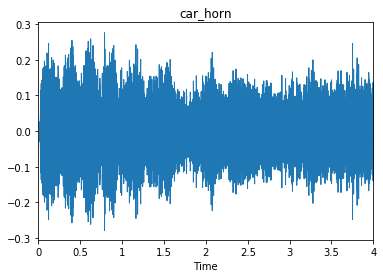

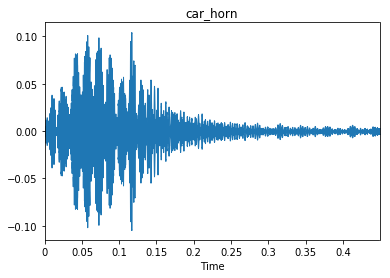

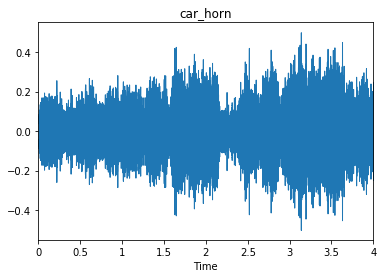

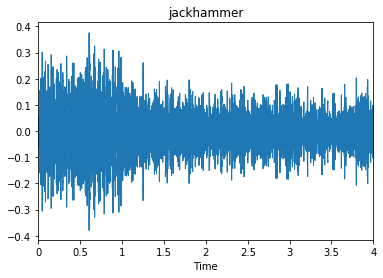

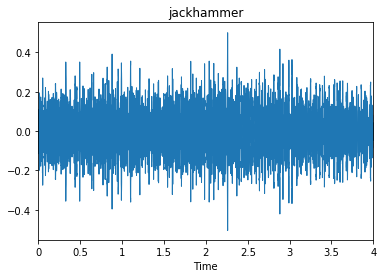

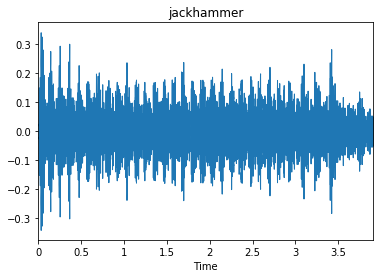

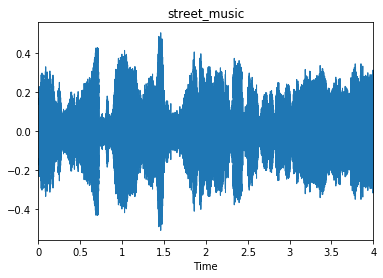

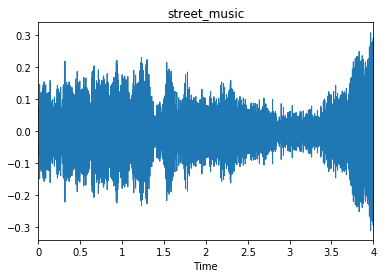

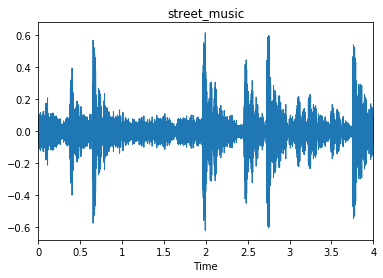

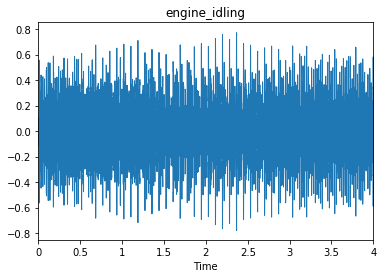

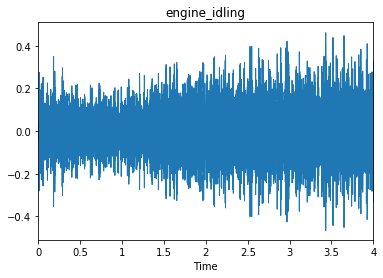

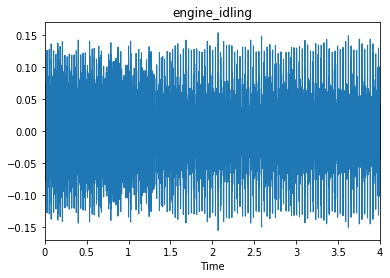

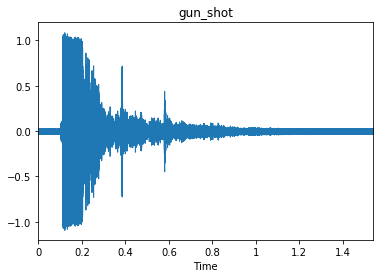

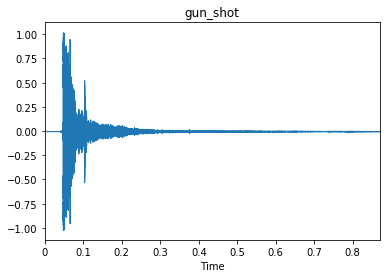

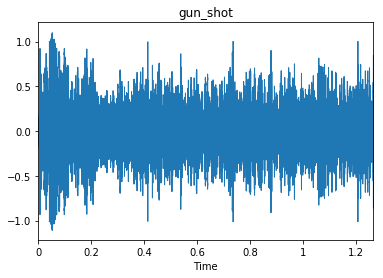

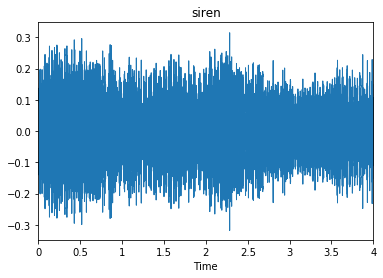

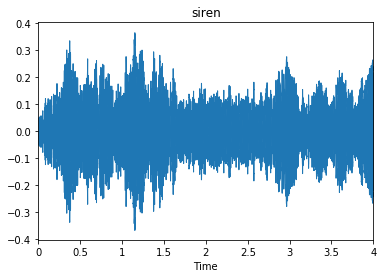

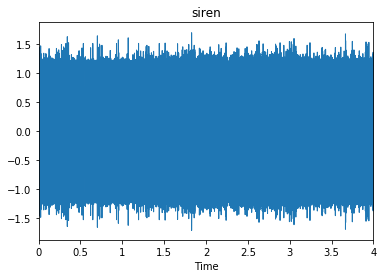

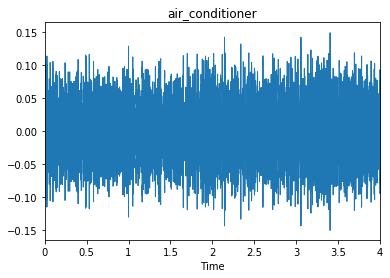

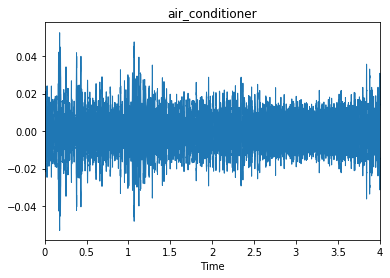

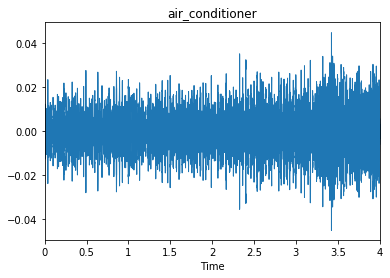

In [89]:
# Produce wave plots for random samples of each class.
for c in classes:
    # Take a random sample of 3 for each class.
    subset = data[data.Class == c].sample(n=3, random_state=88)
    for index, row in subset.iterrows():
        # Generate wave plot for each sample.
        y, sr = librosa.load(row.File)
        plt.figure()
        librosa.display.waveplot(y, sr=sr)
        plt.title(c)
        plt.show()

In [90]:
# Define a function that extracts data from the audio files.
def extract_data(file): 
    # Load the file returning the audio time series and the sampling rate.
    X, sample_rate = librosa.load(file)
    # Perfom short-time Fourier transform.
    # Needed as audio signals are highly non-stationary..
    stft = np.abs(librosa.stft(X))
    # Extract the features that will be used.
    # See accompanying report for more details on features.
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfcc,chroma_stft,melspectrogram,spectral_contrast,tonnetz

In [91]:
# Define empty array to hold data
array = np.empty((193, ))

# Populate array by applying function 
for index, row in data.iterrows():
    mfcc,chroma_stft,melspectrogram,spectral_contrast,tonnetz = extract_data(row.File)
    feature = np.hstack([mfcc,chroma_stft,melspectrogram,spectral_contrast,tonnetz])
    array = np.vstack([array, feature])
print('Complete!')

Complete!


In [94]:
# Delete empty first row of array
array = np.delete(array, 0, 0)

In [95]:
# Save array for future import.
np.save('array_train.npy', array)